# Association Analysis Project Team 9 

## By Laura Kay and Austin Nguyen 

In [86]:
import pandas as pd
from mlxtend.frequent_patterns import apriori, association_rules
import matplotlib.pyplot as plt
%matplotlib inline

### Reading Data

In [87]:
df = pd.read_csv('./data/drinks_dataset.csv', sep=',')

In [88]:
df.head(5)

,Cola,Lemonade,Tea,Unnamed: 3,Iced Tea,Milk,Unnamed: 6,Orange Juice
0,Milk,Coffee,NaN,Water,Iced Tea,NaN,Orange Juice,Cola
1,Lemonade,Milk,Orange Juice,Iced Tea,Coffee,Water,Cola,Tea
2,Lemonade,Coffee,Cola,NaN,Water,NaN,Orange Juice,Tea
3,Orange Juice,Water,Lemonade,Milk,Tea,Coffee,Iced Tea,Cola
4,Coffee,Iced Tea,Water,Lemonade,NaN,NaN,Milk,NaN


In [89]:
items = (df['Milk'].unique())
items

array([nan, 'Water', 'Coffee', 'Iced Tea', 'Lemonade', 'Milk', 'Tea',
       'Orange Juice', 'Cola'], dtype=object)

In [90]:
encoded_vals = []
for index, row in df.iterrows():
    labels = {}
    uncommons = list(set(items) - set(row))
    commons = list(set(items).intersection(row))
    for uc in uncommons:
        labels[uc] = 0
    for com in commons:
        labels[com] = 1
    encoded_vals.append(labels)
encoded_vals

[{'Tea': 0,
  'Lemonade': 0,
  'Orange Juice': 1,
  'Milk': 1,
  'Coffee': 1,
  nan: 1,
  'Iced Tea': 1,
  'Cola': 1,
  'Water': 1},
 {nan: 0,
  'Orange Juice': 1,
  'Lemonade': 1,
  'Tea': 1,
  'Milk': 1,
  'Coffee': 1,
  'Iced Tea': 1,
  'Cola': 1,
  'Water': 1},
 {'Iced Tea': 0,
  'Milk': 0,
  'Orange Juice': 1,
  'Lemonade': 1,
  'Tea': 1,
  'Coffee': 1,
  nan: 1,
  'Cola': 1,
  'Water': 1},
 {nan: 0,
  'Orange Juice': 1,
  'Lemonade': 1,
  'Tea': 1,
  'Milk': 1,
  'Coffee': 1,
  'Iced Tea': 1,
  'Cola': 1,
  'Water': 1},
 {'Orange Juice': 0,
  'Cola': 0,
  'Tea': 0,
  'Lemonade': 1,
  'Milk': 1,
  'Coffee': 1,
  nan: 1,
  'Iced Tea': 1,
  'Water': 1},
 {'Cola': 0,
  'Orange Juice': 1,
  'Lemonade': 1,
  'Tea': 1,
  'Milk': 1,
  'Coffee': 1,
  nan: 1,
  'Iced Tea': 1,
  'Water': 1},
 {'Cola': 0,
  'Water': 0,
  'Milk': 0,
  'Orange Juice': 1,
  'Lemonade': 1,
  'Tea': 1,
  'Coffee': 1,
  nan: 1,
  'Iced Tea': 1},
 {nan: 0,
  'Orange Juice': 1,
  'Lemonade': 1,
  'Tea': 1,
  'Milk':

In [91]:
ohe_df = pd.DataFrame(encoded_vals)
ohe_df.head(3)

,Tea,Lemonade,Orange Juice,Milk,Coffee,NaN,Iced Tea,Cola,Water
0,0,0,1,1,1,1,1,1,1
1,1,1,1,1,1,0,1,1,1
2,1,1,1,0,1,1,0,1,1


In [92]:
freq_items = apriori(ohe_df, min_support=0.2, use_colnames=True, verbose=1)
freq_items

Processing 8 combinations | Sampling itemset size 8


/Users/laurakay/anaconda3/lib/python3.11/site-packages/mlxtend/frequent_patterns/fpcommon.py:109: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


,support,itemsets
0,0.798680,(Tea)
1,0.792279,(Lemonade)
2,0.800480,(Orange Juice)
3,0.803180,(Milk)
4,0.797780,(Coffee)
...,...,...
412,0.203620,"(Orange Juice, Lemonade, Tea, Milk, Iced Tea, ..."
413,0.204320,"(Orange Juice, Lemonade, Tea, Coffee, Iced Tea..."
414,0.203720,"(Lemonade, Tea, Milk, Coffee, Iced Tea, Cola, ..."
415,0.206721,"(Orange Juice, Tea, Milk, Coffee, Iced Tea, Co..."


In [93]:
rules = association_rules(freq_items, metric="confidence", min_threshold=0.6)
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(Tea),(Lemonade),0.798680,0.792279,0.635164,0.795267,1.003771,0.002386,1.014592,0.018660
1,(Lemonade),(Tea),0.792279,0.798680,0.635164,0.801691,1.003771,0.002386,1.015187,0.018085
2,(Tea),(Orange Juice),0.798680,0.800480,0.640164,0.801528,1.001309,0.000837,1.005278,0.006492
3,(Orange Juice),(Tea),0.800480,0.798680,0.640164,0.799725,1.001309,0.000837,1.005219,0.006551
4,(Tea),(Milk),0.798680,0.803180,0.638964,0.800025,0.996072,-0.002520,0.984222,-0.019214
...,...,...,...,...,...,...,...,...,...,...
3370,"(Lemonade, Milk, Coffee, Iced Tea, Water)","(Orange Juice, Cola)",0.322532,0.636564,0.202320,0.627287,0.985427,-0.002992,0.975110,-0.021363
3371,"(Lemonade, Milk, Coffee, Cola, Water)","(Orange Juice, Iced Tea)",0.318932,0.643964,0.202320,0.634368,0.985098,-0.003061,0.973754,-0.021728
3372,"(Lemonade, Milk, Iced Tea, Cola, Water)","(Orange Juice, Coffee)",0.316132,0.638964,0.202320,0.639987,1.001602,0.000324,1.002843,0.002338
3373,"(Lemonade, Coffee, Iced Tea, Cola, Water)","(Orange Juice, Milk)",0.317932,0.643164,0.202320,0.636364,0.989426,-0.002162,0.981298,-0.015426


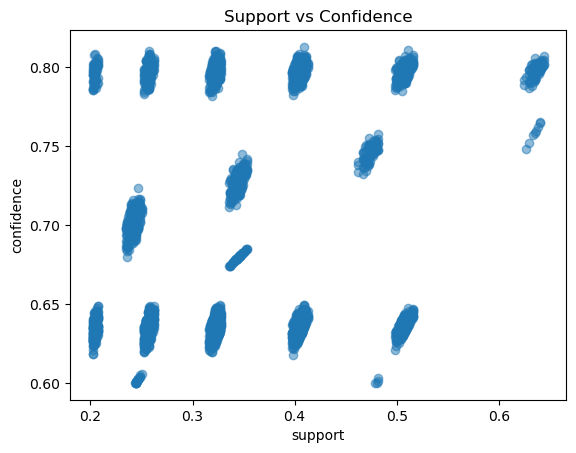

In [94]:
plt.scatter(rules['support'], rules['confidence'], alpha=0.5)
plt.xlabel('support')
plt.ylabel('confidence')
plt.title('Support vs Confidence')
plt.show()

### Testing results with different pairs of minimum support and minimum confidence 

## First test 

In [95]:
freq_items = apriori(ohe_df, min_support=0.3, use_colnames=True, verbose=1)
freq_items

Processing 168 combinations | Sampling itemset size 6


/Users/laurakay/anaconda3/lib/python3.11/site-packages/mlxtend/frequent_patterns/fpcommon.py:109: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


,support,itemsets
0,0.798680,(Tea)
1,0.792279,(Lemonade)
2,0.800480,(Orange Juice)
3,0.803180,(Milk)
4,0.797780,(Coffee)
...,...,...
306,0.327033,"(Orange Juice, Milk, Coffee, Iced Tea, Water)"
307,0.321832,"(Orange Juice, Milk, Coffee, Cola, Water)"
308,0.321132,"(Orange Juice, Milk, Iced Tea, Cola, Water)"
309,0.320132,"(Orange Juice, Coffee, Iced Tea, Cola, Water)"


In [96]:
rules = association_rules(freq_items, metric="confidence", min_threshold=0.5)
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(Tea),(Lemonade),0.798680,0.792279,0.635164,0.795267,1.003771,0.002386,1.014592,0.018660
1,(Lemonade),(Tea),0.792279,0.798680,0.635164,0.801691,1.003771,0.002386,1.015187,0.018085
2,(Tea),(Orange Juice),0.798680,0.800480,0.640164,0.801528,1.001309,0.000837,1.005278,0.006492
3,(Orange Juice),(Tea),0.800480,0.798680,0.640164,0.799725,1.001309,0.000837,1.005219,0.006551
4,(Tea),(Milk),0.798680,0.803180,0.638964,0.800025,0.996072,-0.002520,0.984222,-0.019214
...,...,...,...,...,...,...,...,...,...,...
3451,"(Cola, Coffee)","(Iced Tea, Water, Milk)",0.632263,0.507551,0.322932,0.510756,1.006315,0.002027,1.006552,0.017066
3452,"(Water, Coffee)","(Iced Tea, Cola, Milk)",0.630063,0.509351,0.322932,0.512540,1.006260,0.002009,1.006542,0.016818
3453,"(Iced Tea, Cola)","(Water, Milk, Coffee)",0.639664,0.510751,0.322932,0.504847,0.988440,-0.003777,0.988076,-0.031436
3454,"(Iced Tea, Water)","(Cola, Milk, Coffee)",0.632663,0.508551,0.322932,0.510433,1.003701,0.001191,1.003845,0.010039


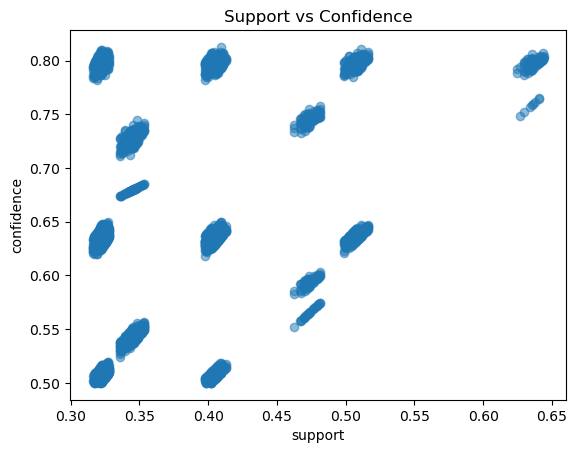

In [97]:
plt.scatter(rules['support'], rules['confidence'], alpha=0.5)
plt.xlabel('support')
plt.ylabel('confidence')
plt.title('Support vs Confidence')
plt.show()

## Second Test

In [98]:
freq_items = apriori(ohe_df, min_support=0.1, use_colnames=True, verbose=1)
freq_items

Processing 8 combinations | Sampling itemset size 8


/Users/laurakay/anaconda3/lib/python3.11/site-packages/mlxtend/frequent_patterns/fpcommon.py:109: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


,support,itemsets
0,0.798680,(Tea)
1,0.792279,(Lemonade)
2,0.800480,(Orange Juice)
3,0.803180,(Milk)
4,0.797780,(Coffee)
...,...,...
469,0.204320,"(Orange Juice, Lemonade, Tea, Coffee, Iced Tea..."
470,0.203720,"(Lemonade, Tea, Milk, Coffee, Iced Tea, Cola, ..."
471,0.206721,"(Orange Juice, Tea, Milk, Coffee, Iced Tea, Co..."
472,0.202320,"(Orange Juice, Lemonade, Milk, Coffee, Iced Te..."


In [99]:
rules = association_rules(freq_items, metric="confidence", min_threshold=0.7)
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(Tea),(Lemonade),0.798680,0.792279,0.635164,0.795267,1.003771,0.002386,1.014592,0.018660
1,(Lemonade),(Tea),0.792279,0.798680,0.635164,0.801691,1.003771,0.002386,1.015187,0.018085
2,(Tea),(Orange Juice),0.798680,0.800480,0.640164,0.801528,1.001309,0.000837,1.005278,0.006492
3,(Orange Juice),(Tea),0.800480,0.798680,0.640164,0.799725,1.001309,0.000837,1.005219,0.006551
4,(Tea),(Milk),0.798680,0.803180,0.638964,0.800025,0.996072,-0.002520,0.984222,-0.019214
...,...,...,...,...,...,...,...,...,...,...
1446,"(Orange Juice, Lemonade, Tea, Milk, Iced Tea, ...",(Coffee),0.203620,0.797780,0.162616,0.798625,1.001059,0.000172,1.004196,0.001329
1447,"(Orange Juice, Lemonade, Tea, Coffee, Iced Tea...",(Milk),0.204320,0.803180,0.162616,0.795888,0.990921,-0.001490,0.964275,-0.011384
1448,"(Orange Juice, Lemonade, Milk, Coffee, Iced Te...",(Tea),0.202320,0.798680,0.162616,0.803757,1.006357,0.001027,1.025871,0.007919
1449,"(Orange Juice, Tea, Milk, Coffee, Iced Tea, Co...",(Lemonade),0.206721,0.792279,0.162616,0.786647,0.992892,-0.001164,0.973603,-0.008944


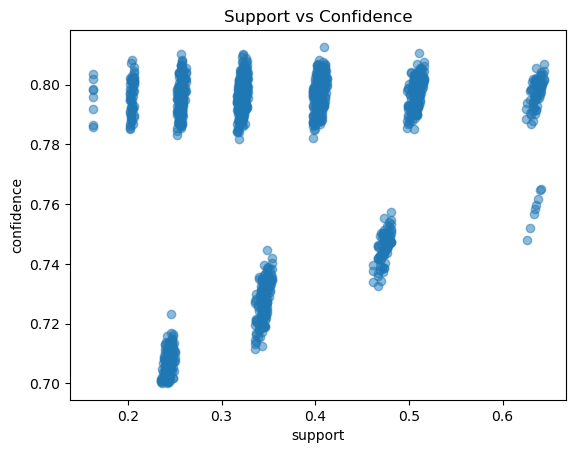

In [100]:
plt.scatter(rules['support'], rules['confidence'], alpha=0.5)
plt.xlabel('support')
plt.ylabel('confidence')
plt.title('Support vs Confidence')
plt.show()